In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn as nn

In [2]:
X = np.arange(-1,1,0.001)
X.shape

(2000,)

In [3]:
y = 4*X**3 + 2**X + 3
y.shape

(2000,)

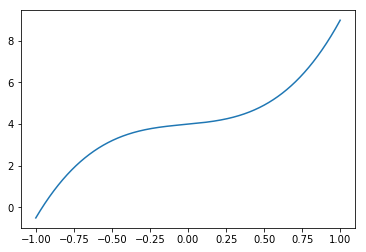

In [4]:
plt.plot(X,y)

In [5]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        
        self.x2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

        self.tanh = nn.Tanh()
        
    def forward(self, x, h):
        x_ = self.x2h(x)
        h_ = self.h2h(h)
        #h_ = h_.expand_as(x_)
        new_h = x_ + h_
        new_h = self.tanh(new_h)
        output = self.h2o(new_h)
        return output, new_h
    
    def reset_hidden(self, batch_size=1):
        return Variable(torch.zeros(batch_size, self.hidden_size))

In [6]:
hidden_size = 3
input_size = 1
output_size = 1
batch_size = 4

rnn = RNN(input_size, hidden_size, output_size)

In [7]:
hidden = rnn.reset_hidden(batch_size=batch_size)
hidden

Variable containing:
 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 4x3]

In [8]:
batch = Variable(torch.from_numpy(X[:batch_size, np.newaxis])).float()
batch

Variable containing:
-1.0000
-0.9990
-0.9980
-0.9970
[torch.FloatTensor of size 4x1]

In [9]:
rnn.forward(batch, hidden)

(Variable containing:
 -0.1011
 -0.1014
 -0.1016
 -0.1019
 [torch.FloatTensor of size 4x1], Variable containing:
  0.6076  0.4293 -0.2759
  0.6071  0.4293 -0.2750
  0.6067  0.4294 -0.2741
  0.6062  0.4295 -0.2732
 [torch.FloatTensor of size 4x3])

In [10]:
rnn.forward(batch, hidden)

(Variable containing:
 -0.1011
 -0.1014
 -0.1016
 -0.1019
 [torch.FloatTensor of size 4x1], Variable containing:
  0.6076  0.4293 -0.2759
  0.6071  0.4293 -0.2750
  0.6067  0.4294 -0.2741
  0.6062  0.4295 -0.2732
 [torch.FloatTensor of size 4x3])

In [11]:
output, new_hidden = rnn.forward(batch, hidden)
output

Variable containing:
-0.1011
-0.1014
-0.1016
-0.1019
[torch.FloatTensor of size 4x1]

In [12]:
new_hidden

Variable containing:
 0.6076  0.4293 -0.2759
 0.6071  0.4293 -0.2750
 0.6067  0.4294 -0.2741
 0.6062  0.4295 -0.2732
[torch.FloatTensor of size 4x3]

In [13]:
rnn.forward(batch, new_hidden)

(Variable containing:
 1.00000e-02 *
  -2.1973
  -2.2158
  -2.2344
  -2.2530
 [torch.FloatTensor of size 4x1], Variable containing:
  0.8017  0.3907 -0.5992
  0.8013  0.3911 -0.5982
  0.8009  0.3915 -0.5972
  0.8006  0.3919 -0.5962
 [torch.FloatTensor of size 4x3])

In [14]:
def get_variable_from_np(X):
    return Variable(torch.from_numpy(X)).float()

In [15]:
batch = get_variable_from_np(X[:batch_size, np.newaxis])
batch

Variable containing:
-1.0000
-0.9990
-0.9980
-0.9970
[torch.FloatTensor of size 4x1]

In [16]:
batch = get_variable_from_np(X[:, np.newaxis])
hidden = rnn.reset_hidden(batch_size=X.shape[0])
y_pred, _ = rnn.forward(batch, hidden)
y_pred.size()

torch.Size([2000, 1])

In [17]:
y_pred.squeeze().data.numpy().shape

(2000,)

In [18]:
y_pred_np = y_pred.squeeze().data.numpy()

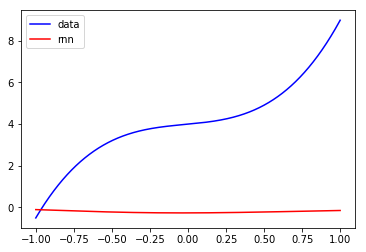

In [19]:
plt.plot(X,y, '-b', label='data')
plt.plot(X,y_pred_np, '-r', label='rnn')
plt.legend()

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.001, momentum=0.9)

In [21]:
batch_size = 4
TIMESTEPS = X.shape[0]

optimizer.zero_grad()
loss = 0
hidden = rnn.reset_hidden(batch_size=batch_size)
for t in range(TIMESTEPS - batch_size):
    batch = get_variable_from_np(X[t:t+batch_size, np.newaxis])
    target = get_variable_from_np(y[t:t+batch_size, np.newaxis])
    output, hidden = rnn.forward(batch, hidden)
    loss += criterion(output, target)
loss.backward()
optimizer.step()

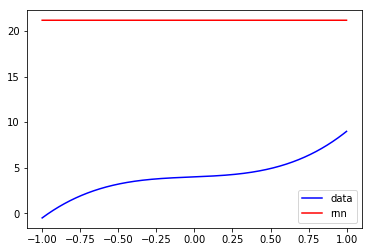

In [22]:
batch = get_variable_from_np(X[:, np.newaxis])
hidden = rnn.reset_hidden(batch_size=X.shape[0])
y_pred, _ = rnn.forward(batch, hidden)
y_pred.size()
y_pred_np = y_pred.squeeze().data.numpy()
plt.plot(X,y, '-b', label='data')
plt.plot(X,y_pred_np, '-r', label='rnn')
plt.legend()

In [23]:
loss

Variable containing:
 42885.5781
[torch.FloatTensor of size 1]

In [24]:
loss.data[0]

42885.578125

In [25]:
batch_size = 1
TIMESTEPS = X.shape[0]
epochs = 10

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.001, momentum=0.9)
for i in range(epochs):
    loss = 0
    optimizer.zero_grad()
    hidden = rnn.reset_hidden(batch_size=batch_size)
    for t in range(TIMESTEPS - batch_size):
        batch = get_variable_from_np(X[t:t+batch_size, np.newaxis])
        target = get_variable_from_np(y[t:t+batch_size, np.newaxis])
        output, hidden = rnn.forward(batch, hidden)
        loss += criterion(output, target)
    loss.backward()
    optimizer.step()
    print("Loss at epoch [%s]: %.3f" % (i, loss.data[0]))

Loss at epoch [0]: 591225.438
Loss at epoch [1]: 131259592.000
Loss at epoch [2]: 25611079680.000
Loss at epoch [3]: 1281486094336.000
Loss at epoch [4]: 81546337845248.000
Loss at epoch [5]: 16190917530615808.000
Loss at epoch [6]: 3186393218509963264.000
Loss at epoch [7]: 627015487708005924864.000
Loss at epoch [8]: 123386533121352473247744.000
Loss at epoch [9]: 24277972012965988541661184.000


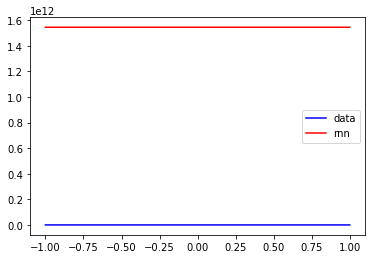

In [26]:
batch = get_variable_from_np(X[:, np.newaxis])
hidden = rnn.reset_hidden(batch_size=X.shape[0])
y_pred, _ = rnn.forward(batch, hidden)
y_pred.size()
y_pred_np = y_pred.squeeze().data.numpy()
plt.plot(X,y, '-b', label='data')
plt.plot(X,y_pred_np, '-r', label='rnn')
plt.legend()

## Use LSTM cell

In [27]:
lstm = nn.LSTMCell(input_size=input_size, hidden_size=hidden_size)
output_layer = nn.Linear(hidden_size, output_size)

In [28]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD([
    {"params": lstm.parameters()},
    {"params": output_layer.parameters()}
], lr=0.001, momentum=0.9)

In [29]:
batch_size = 1
TIMESTEPS = X.shape[0]
epochs = 10

for i in range(epochs):
    loss = 0
    optimizer.zero_grad()
    hidden = rnn.reset_hidden(batch_size=batch_size) # Use same hidden function from RNN class
    cell_state = rnn.reset_hidden(batch_size=batch_size) # Use same hidden function from RNN class
    for t in range(TIMESTEPS):
        batch = get_variable_from_np(X[t:t+batch_size, np.newaxis])
        target = get_variable_from_np(y[t:t+batch_size, np.newaxis])
        hidden, cell_state = lstm.forward(batch, (hidden, cell_state))
        output = output_layer.forward(hidden)
        loss += criterion(output, target)
    loss = loss / TIMESTEPS
    loss.backward()
    optimizer.step()
    print("Loss at epoch [%s]: %.3f" % (i, loss.data[0]))

Loss at epoch [0]: 20.835
Loss at epoch [1]: 20.756
Loss at epoch [2]: 20.606
Loss at epoch [3]: 20.393
Loss at epoch [4]: 20.127
Loss at epoch [5]: 19.813
Loss at epoch [6]: 19.459
Loss at epoch [7]: 19.072
Loss at epoch [8]: 18.657
Loss at epoch [9]: 18.220


In [30]:
batch_size = 1
hidden = rnn.reset_hidden(batch_size=batch_size) # Use same hidden function from RNN class
cell_state = rnn.reset_hidden(batch_size=batch_size) # Use same hidden function from RNN class
y_pred = []
for t in range(TIMESTEPS):
    batch = get_variable_from_np(X[t:t+batch_size, np.newaxis])
    target = get_variable_from_np(y[t:t+batch_size, np.newaxis])
    hidden, cell_state = lstm.forward(batch, (hidden, cell_state))
    output = output_layer.forward(hidden)
    y_pred.append(output.data)

In [31]:
y_pred[0]


 0.2523
[torch.FloatTensor of size 1x1]

In [32]:
y_pred_np = np.array([k.numpy() for k in y_pred]).squeeze()
y_pred_np.shape

(2000,)

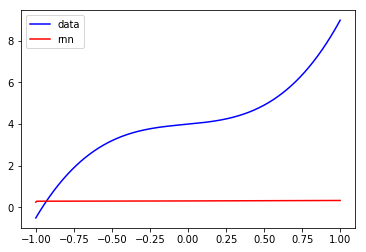

In [33]:
plt.plot(X,y, '-b', label='data')
plt.plot(X,y_pred_np, '-r', label='rnn')
plt.legend()

## Use LSTM Layer

In [34]:
lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
output_layer = nn.Linear(hidden_size, output_size)

In [35]:
batch = get_variable_from_np(X[:, np.newaxis, np.newaxis])
batch.size()

torch.Size([2000, 1, 1])

In [36]:
hidden = Variable(torch.zeros(1, batch.size(1), hidden_size))
cell_state = Variable(torch.zeros(1, batch.size(1), hidden_size))

In [37]:
hx = (hidden, cell_state)
output, (h_n, c_n) = lstm.forward(batch, hx)

In [38]:
output.size()

torch.Size([2000, 1, 3])

In [39]:
out = output_layer.forward(output[0])
out

Variable containing:
 0.2300
[torch.FloatTensor of size 1x1]

In [40]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD([
    {"params": lstm.parameters()},
    {"params": output_layer.parameters()}
], lr=0.001, momentum=0.9)

In [41]:
batch_size = 1
epochs = 10

for i in range(epochs):
    loss = 0
    optimizer.zero_grad()
    batch = get_variable_from_np(X[:, np.newaxis, np.newaxis])
    target = get_variable_from_np(y[:, np.newaxis, np.newaxis])
    hidden = Variable(torch.zeros(1, batch.size(1), hidden_size))
    cell_state = Variable(torch.zeros(1, batch.size(1), hidden_size))
    hx = (hidden, cell_state)
    output, (h_n, c_n) = lstm.forward(batch, hx)
    for j in range(output.size()[0]):
        out = output_layer.forward(output[i])
        loss += (out - target[i])**2
        #loss += criterion(out, target[i])
    loss = loss / X.shape[0]
    loss.backward()
    optimizer.step()
    print("Loss at epoch [%s]: %.3f" % (i, loss.squeeze().data[0]))

Loss at epoch [0]: 0.533
Loss at epoch [1]: 0.520
Loss at epoch [2]: 0.502
Loss at epoch [3]: 0.480
Loss at epoch [4]: 0.456
Loss at epoch [5]: 0.430
Loss at epoch [6]: 0.405
Loss at epoch [7]: 0.379
Loss at epoch [8]: 0.353
Loss at epoch [9]: 0.327


In [42]:
output.size()

torch.Size([2000, 1, 3])

In [43]:
out

Variable containing:
 0.1822
[torch.FloatTensor of size 1x1]

In [44]:
target[i]

Variable containing:
-0.3898
[torch.FloatTensor of size 1x1]

In [45]:
y_pred = []
for i in range(output.size()[0]):
        out = output_layer.forward(output[i])
        y_pred.append(out.squeeze().data[0])
y_pred = np.array(y_pred)

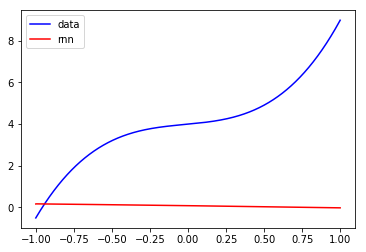

In [46]:
plt.plot(X,y, '-b', label='data')
plt.plot(X,y_pred, '-r', label='rnn')
plt.legend()